In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette("hls", 20)

In [105]:
bike_rentals = pd.read_csv("C:\\Users\\sonja tilly.ABERDEEN\\Bike-Sharing-Dataset\\hour.csv")

In [106]:
bike_rentals.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


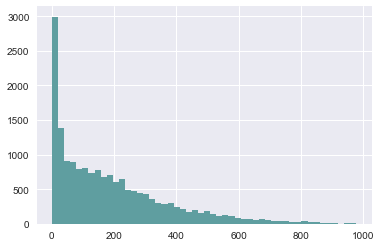

In [107]:
# what is the distribution of cnt?

plt.hist(bike_rentals.cnt, color='cadetblue', bins=50)
plt.show()

In [108]:
# how is the cnt column correlated to other features?

corr = bike_rentals.corr()
corr.cnt.sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

In [109]:
# transform hr column

def assign_label(c):
    if c >= 6 and c <12:
        return 1
    elif c >= 12 and c < 18:
        return 2
    elif c >= 18 and c < 24:
        return 3
    else:
        return 4

In [110]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [111]:
# split dataset into train & test sets

train = bike_rentals.sample(frac=0.8, replace=True)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [112]:
# create predictor columns

columns = ['temp', 'atemp', 'hr', 'instant', 'yr', 'season', 'mnth', 'windspeed', 'workingday',\
          'weekday', 'holiday', 'weathersit', 'hum']

In [113]:
# build linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
linear.fit(train[columns], train['cnt'])
pred_linear = linear.predict(test[columns])

mse_linear = mean_squared_error(test.cnt, pred_linear)
print(np.round(mse_linear))
print(np.round(mse_linear**0.5))

19743.0
141.0


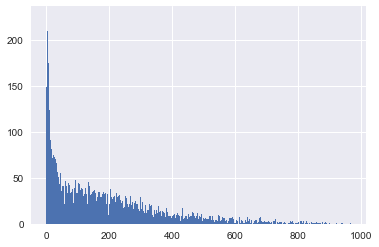

In [114]:
test.cnt.hist(bins=500)

The error is rather large, perhaps due to the fact that the rental count contains a few very large values, which distorts the error metric used above.

In [115]:
# build decision tree model
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=10)
tree.fit(train[columns], train['cnt'])
pred_tree = tree.predict(test[columns])

mse_tree = mean_squared_error(test.cnt, pred_tree)
print(np.round(mse_tree))
print(np.round(mse_tree**0.5))         


2854.0
53.0


Using a decision tree shows a significant improvement on the error.

In [116]:
# build randomforest model

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=1, min_samples_leaf=1)
forest.fit(train[columns], train['cnt'])
pred_forest = forest.predict(test[columns])

mse_forest = mean_squared_error(test.cnt, pred_forest)
print(np.round(mse_forest))
print(np.round(mse_forest**0.5))    

2042.0
45.0


Using random forests reduces the error further. Random forests reduce overfitting and tend to improve accuracy compared to simple decision trees.

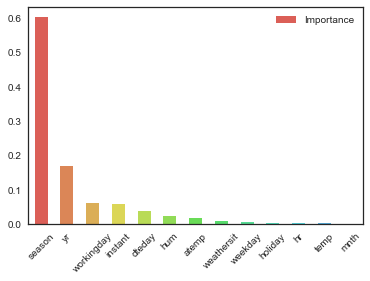

In [142]:
# which features are the most important ones in predicting cnt?

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(test.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances[:20]
importances.sort_values(by='Importance', ascending=False).plot(kind='bar', rot=45, color=color)
sns.set_style("white")

Season is by far the most important feature for predicting count.